## Project 6 - Abalone

Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Making a Prediction
* Predicting the Error
* Comparison of the results of the models

#### Regular EDS and plotting Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing the dataset

In [2]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 6 - Abalone'

#### Loading the dataset

In [3]:
df1 = pd.read_csv('abalone_data.csv',header=None)
df1

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df2 = pd.read_csv('abalone_names.csv',header=None)
df2

,0
0,Name
1,Sex
2,Length
3,Diameter
4,Height
5,Whole weight
6,Shucked weight
7,Viscera weight
8,Shell weight
9,Rings


In [6]:
temp = ['Sex']
for i in range(2,len(df2[0])):
    temp.append(df2[0][i])
print (temp)

df1.columns = temp
print(df1.head)

['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
<bound method NDFrame.head of      Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  

#### Converting the Data into a DataFrame

In [7]:
df = pd.DataFrame(df1)
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


#### Detail and description of the DataFrame

In [8]:
df.shape

(4177, 9)

In [9]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


#### Shifting the first column to the last

In [10]:
first_column = df.pop('Sex')
df.insert(8,'Sex',first_column,allow_duplicates=False)
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,M
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,F
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,M
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,I
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,F
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,M
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,M
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,F


#### Data Cleaning

In [11]:
df.isnull().sum()/df.shape[0] *100

Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
Sex               0.0
dtype: float64

In [63]:
#### To show a quick insight to the number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
 8   Sex             4177 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### Counting the details of the last in our DataFrame

In [12]:
# Counting the values
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [13]:
# Normalized value counts
df['Sex'].value_counts(normalize=True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

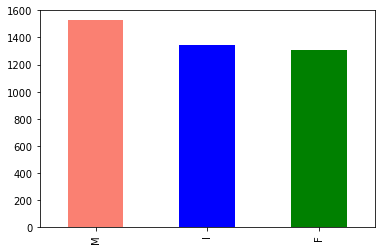

In [14]:
# Plot the value counts with a bar graph
df['Sex'].value_counts().plot(kind="bar", color=["salmon", "blue","green"]);

In [15]:
df.rename(columns = {'Whole weight':'WholeWeight'}, inplace = True)

In [16]:
df.rename(columns = {'Shucked weight':'ShuckedWeight'}, inplace = True)

In [17]:
df.rename(columns = {'Viscera weight':'VisceraWeight'}, inplace = True)

In [18]:
df.rename(columns = {'Shell weight':'ShellWeight'}, inplace = True)

In [19]:
df

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,M
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,F
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,M
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,I
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,F
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,M
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,M
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,F


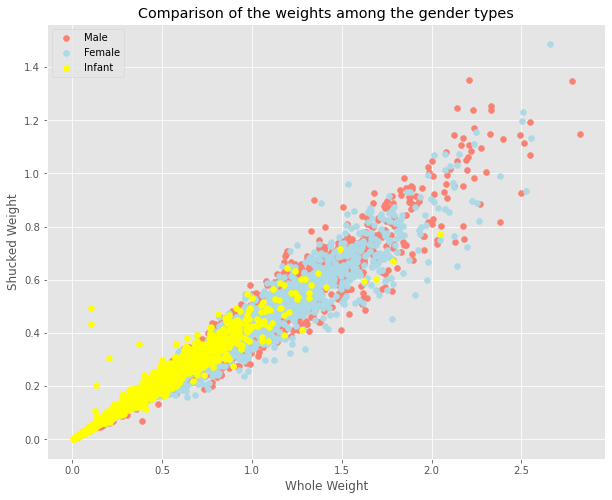

In [78]:
# Create figure

plt.figure(figsize=(10,8))

plt.scatter(df.WholeWeight[df.Sex=='M'], 
            df.ShuckedWeight[df.Sex=='M'], 
            c="salmon") 

plt.scatter(df.WholeWeight[df.Sex=='F'], 
            df.ShuckedWeight[df.Sex=='F'], 
            c="lightblue") 

plt.scatter(df.WholeWeight[df.Sex=='I'], 
            df.ShuckedWeight[df.Sex=='I'], 
            c="yellow") 

plt.title("Comparison of the weights among the gender types")
plt.xlabel("Whole Weight")
plt.ylabel("Shucked Weight");
plt.legend(["Male", "Female","Infant"]);


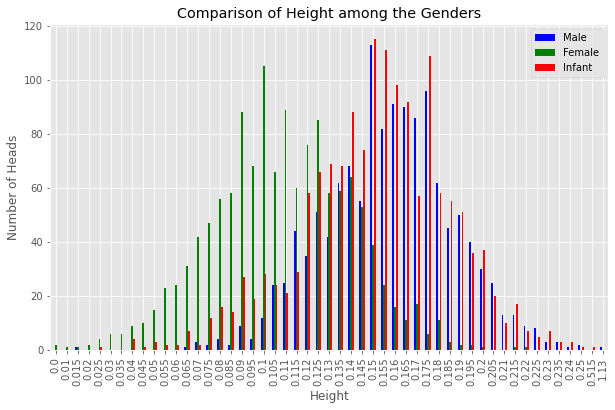

In [91]:
# Create a plot
pd.crosstab(df.Height, df.Sex).plot(kind="bar", figsize=(10,6), color=["blue", "green","red"])

plt.title("Comparison of Height among the Genders")
plt.xlabel("Height")
plt.ylabel("Number of Heads")
plt.legend(["Male", "Female","Infant"])
plt.xticks(rotation=90); 

Text(0, 0.5, 'VisceraWeight')

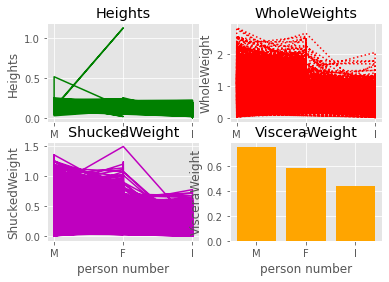

In [34]:
plt.subplot(2,2,1)
plt.plot(df['Sex'],df['Height'], linestyle="-",color="g")
plt.title("Heights")
plt.xlabel("person number")
plt.ylabel("Heights")

plt.subplot(2,2,2)
plt.plot(df['Sex'],df['WholeWeight'], linestyle=":",color="r")
plt.title("WholeWeights")
plt.xlabel("person number")
plt.ylabel("WholeWeight")

plt.subplot(2,2,3)
plt.plot(df['Sex'],df['ShuckedWeight'], linestyle="-",color="m")
plt.title("ShuckedWeight")
plt.xlabel("person number")
plt.ylabel("ShuckedWeight")

plt.subplot(2,2,4)
plt.bar(df['Sex'],df['VisceraWeight'], color="orange")
plt.title("VisceraWeight")
plt.xlabel("person number")
plt.ylabel("VisceraWeight")

#### Correlation between independent variables

In [35]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


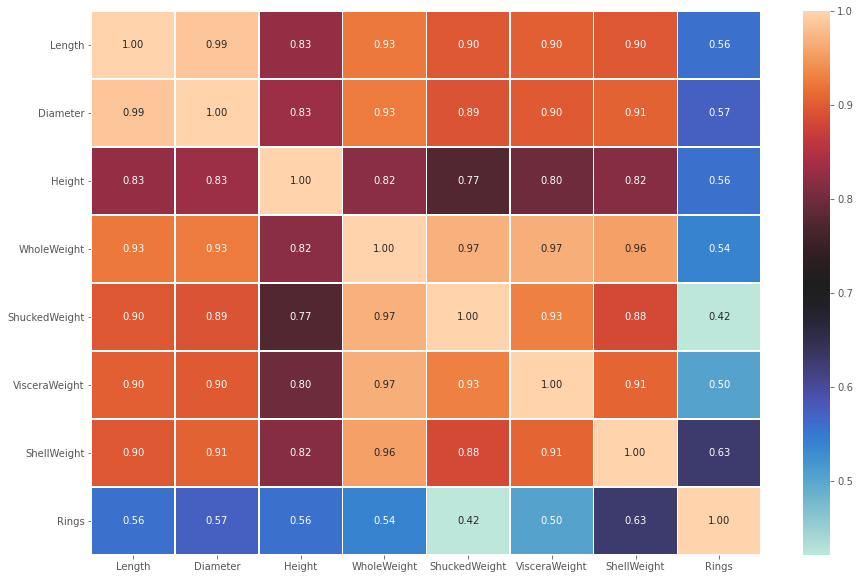

In [38]:
# Another figure with a little better look

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt=".2f",
           cmap="icefire");


#### Modelling

In [39]:
df.head()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,M
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,M
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,F
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,M
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,I


In [49]:
df.reset_index(inplace=True)

In [50]:
# Everything except target variable
X = df.drop("Sex", axis=1)

# Target variable
y = df["Sex"]

In [51]:
# Independent variables (no target column)
X.head()

,level_0,index,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,3,3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,4,4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [52]:
X.drop('index', axis=1, inplace=True)

In [53]:
# Sex column
y

0       M
1       M
2       F
3       M
4       I
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 4177, dtype: object

#### Splitting the data into Train & Test

In [54]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2) 

In [55]:
X_train

,level_0,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
4038,4038,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,1272,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,3384,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,3160,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,3894,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12
...,...,...,...,...,...,...,...,...,...
3444,3444,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
466,466,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3092,3092,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3772,3772,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


In [56]:
X_test

,level_0,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
866,866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,9
1483,1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,8
599,599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,16
1702,1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,9
670,670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,14
...,...,...,...,...,...,...,...,...,...
3093,3093,0.520,0.430,0.150,0.7280,0.3020,0.1575,0.235,11
1651,1651,0.595,0.435,0.150,0.9000,0.4175,0.1700,0.265,8
2897,2897,0.545,0.430,0.150,0.7420,0.3525,0.1580,0.208,10
3953,3953,0.465,0.355,0.120,0.5805,0.2550,0.0915,0.184,8


In [59]:
y_train,len(y_test)

(4038    I
 1272    I
 3384    F
 3160    I
 3894    M
        ..
 3444    F
 466     F
 3092    M
 3772    M
 860     F
 Name: Sex, Length: 3341, dtype: object,
 836)

In [60]:
y_test, len(y_test)

(866     M
 1483    M
 599     F
 1702    F
 670     M
        ..
 3093    F
 1651    F
 2897    I
 3953    I
 1830    I
 Name: Sex, Length: 836, dtype: object,
 836)

#### Model choices

1. Logistic Regression - LogisticRegression()
2. K-Nearest Neighbors - KNeighboursClassifier()
3. RandomForest - RandomForestClassifier()

### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [62]:
# Loading Linear Regression
LR_model = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fitting the model
LR_model.fit(X_train, y_train)

#predict
LR_predicted_y_test  = LR_model.predict(X_test)

#actual
LR_actual_y_test = y_test

In [63]:
LR_predicted_y_test

array(['M', 'M', 'F', 'M', 'M', 'I', 'M', 'M', 'I', 'M', 'F', 'I', 'M',
       'I', 'I', 'F', 'M', 'M', 'M', 'I', 'F', 'M', 'M', 'M', 'M', 'I',
       'I', 'I', 'M', 'M', 'M', 'M', 'I', 'M', 'I', 'M', 'I', 'I', 'I',
       'I', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'I', 'I', 'F',
       'I', 'I', 'I', 'M', 'M', 'F', 'M', 'I', 'M', 'M', 'M', 'I', 'I',
       'M', 'I', 'I', 'M', 'M', 'M', 'M', 'I', 'I', 'I', 'M', 'F', 'M',
       'F', 'M', 'I', 'M', 'M', 'I', 'I', 'M', 'M', 'M', 'F', 'M', 'I',
       'M', 'M', 'M', 'M', 'M', 'I', 'M', 'I', 'I', 'M', 'M', 'M', 'M',
       'M', 'I', 'M', 'I', 'M', 'M', 'M', 'I', 'M', 'I', 'I', 'I', 'M',
       'I', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'I', 'I', 'I', 'M', 'M', 'I', 'M', 'I', 'M', 'I',
       'I', 'M', 'M', 'M', 'I', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'I', 'I', 'I', 'M', 'I', 'M', 'M', 'I', 'M', 'F', 'M', 'M',
       'M', 'M', 'M', 'M', 'I', 'I', 'I', 'M', 'I', 'M', 'M', 'M

In [64]:
LR_actual_y_test

866     M
1483    M
599     F
1702    F
670     M
       ..
3093    F
1651    F
2897    I
3953    I
1830    I
Name: Sex, Length: 836, dtype: object

### K-Nearest Neighbors Classifier

In [65]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [66]:
# Loading K-Nearest Neighbors
KNN_model = KNC(n_neighbors = 3)

# Fitting the model
KNN_model.fit(X_train, y_train)

#predict
KNN_predicted_y_test  = KNN_model.predict(X_test)

#actual
KNN_actual_y_test = y_test

In [67]:
KNN_predicted_y_test

array(['F', 'F', 'I', 'M', 'F', 'F', 'I', 'M', 'I', 'F', 'M', 'F', 'M',
       'F', 'I', 'F', 'M', 'M', 'F', 'I', 'F', 'M', 'F', 'M', 'I', 'I',
       'I', 'F', 'F', 'M', 'F', 'F', 'I', 'M', 'I', 'F', 'I', 'I', 'F',
       'I', 'F', 'F', 'M', 'I', 'F', 'F', 'F', 'M', 'M', 'I', 'I', 'M',
       'I', 'I', 'I', 'I', 'F', 'M', 'M', 'M', 'F', 'M', 'F', 'I', 'I',
       'M', 'I', 'I', 'M', 'M', 'F', 'M', 'M', 'I', 'I', 'F', 'F', 'F',
       'F', 'F', 'M', 'M', 'F', 'I', 'I', 'F', 'I', 'I', 'F', 'M', 'M',
       'I', 'M', 'M', 'F', 'I', 'I', 'M', 'M', 'I', 'M', 'F', 'F', 'F',
       'M', 'M', 'F', 'F', 'M', 'M', 'M', 'I', 'I', 'I', 'I', 'I', 'I',
       'F', 'F', 'I', 'F', 'F', 'F', 'F', 'I', 'F', 'F', 'F', 'M', 'F',
       'I', 'M', 'F', 'I', 'I', 'M', 'M', 'F', 'M', 'M', 'I', 'F', 'I',
       'I', 'M', 'F', 'I', 'F', 'F', 'F', 'M', 'F', 'F', 'M', 'F', 'F',
       'I', 'F', 'I', 'F', 'M', 'F', 'M', 'M', 'I', 'F', 'M', 'F', 'M',
       'M', 'I', 'F', 'M', 'M', 'I', 'M', 'I', 'F', 'F', 'M', 'M

In [68]:
KNN_actual_y_test

866     M
1483    M
599     F
1702    F
670     M
       ..
3093    F
1651    F
2897    I
3953    I
1830    I
Name: Sex, Length: 836, dtype: object

### RandomForest Classification

In [69]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [70]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(X_train, y_train)

#prediction 
RF_predicted_y_test = RF_model.predict(X_test)

#actual
RF_actual_y_test = y_test

In [71]:
RF_predicted_y_test

array(['M', 'M', 'M', 'M', 'I', 'I', 'I', 'I', 'I', 'M', 'M', 'I', 'M',
       'I', 'I', 'M', 'M', 'M', 'M', 'I', 'M', 'M', 'M', 'M', 'M', 'I',
       'I', 'I', 'M', 'M', 'M', 'M', 'I', 'M', 'I', 'M', 'I', 'I', 'I',
       'I', 'M', 'M', 'M', 'I', 'M', 'M', 'M', 'M', 'M', 'I', 'I', 'M',
       'I', 'I', 'I', 'M', 'M', 'M', 'M', 'I', 'M', 'M', 'M', 'I', 'I',
       'M', 'I', 'I', 'I', 'M', 'M', 'M', 'I', 'I', 'I', 'M', 'M', 'M',
       'M', 'I', 'I', 'M', 'M', 'I', 'I', 'M', 'M', 'I', 'M', 'M', 'I',
       'M', 'M', 'M', 'M', 'M', 'I', 'M', 'M', 'I', 'M', 'M', 'M', 'M',
       'M', 'I', 'M', 'I', 'M', 'M', 'M', 'M', 'M', 'M', 'I', 'I', 'I',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'I', 'M', 'M', 'M', 'M', 'M',
       'M', 'I', 'M', 'I', 'I', 'M', 'M', 'M', 'I', 'M', 'I', 'I', 'M',
       'I', 'M', 'M', 'M', 'I', 'M', 'M', 'I', 'M', 'M', 'M', 'M', 'M',
       'M', 'I', 'I', 'I', 'M', 'I', 'M', 'M', 'I', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'I', 'I', 'M', 'M', 'I', 'M', 'M', 'M

In [72]:
RF_actual_y_test

866     M
1483    M
599     F
1702    F
670     M
       ..
3093    F
1651    F
2897    I
3953    I
1830    I
Name: Sex, Length: 836, dtype: object

### Model Comparison

In [73]:
print ( 'Logistic Regression:',LR_model.score(X_train,y_train),
        'K-Nearest Neighbor:',KNN_model.score(X_train,y_train),
        'Random Forest Classifier:',RF_model.score(X_train,y_train),sep="\n")

Logistic Regression:
0.5345704878778809
K-Nearest Neighbor:
0.7506734510625561
Random Forest Classifier:
0.5300808141275067


<Figure size 1440x1296 with 0 Axes>

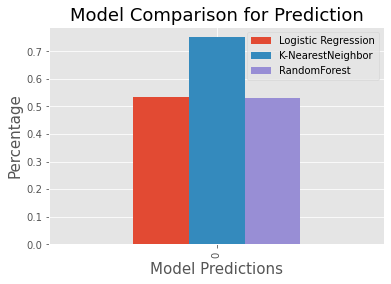

In [74]:
# A figure created to show the comparison of the three model predictions

A = (LR_model.score(X_train,y_train),KNN_model.score(X_train, y_train),RF_model.score(X_train,y_train))
B = (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0)
model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(20, 18))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Logistic Regression","K-NearestNeighbor","RandomForest"]);